# AQUA ALERT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
%matplotlib inline

In [3]:
#Loading the dataset
df = pd.read_csv('train1.csv')

In [4]:
df.head()

,OFFCHIP_PLATINUM_78kHz_RESISTANCE,OFFCHIP_GOLD_78kHz_RESISTANCE,OFFCHIP_PLATINUM_200Hz_RESISTANCE,OFFCHIP_PLATINUM_200Hz_CAPACITANCE,OFFCHIP_GOLD_200Hz_RESISTANCE,OFFCHIP_GOLD_200Hz_CAPACITANCE,OFFCHIP_COPPER_200Hz_RESISTANCE,OFFCHIP_COPPER_200Hz_CAPACITANCE,OFFCHIP_SILVER_200Hz_RESISTANCE,OFFCHIP_SILVER_200Hz_CAPACITANCE,OFFCHIP_NICKEL_200Hz_RESISTANCE,OFFCHIP_NICKEL_200Hz_CAPACITANCE,CLASS
0,4281.0,16096.0,1667.0,-1292.0,7733.0,-5988.0,3172.0,-2913.0,3195.0,-2444.0,10378.0,-4895.0,0
1,4281.0,16095.0,1673.0,-1291.0,7733.0,-5991.0,3209.0,-2908.0,3125.0,-2427.0,10380.0,-4896.0,0
2,4284.0,16099.0,1677.0,-1298.0,7724.0,-5993.0,3213.0,-2905.0,3107.0,-2413.0,10378.0,-4896.0,0
3,4277.0,16099.0,1674.0,-1288.0,7720.0,-5990.0,3213.0,-2898.0,3069.0,-2413.0,10359.0,-4901.0,0
4,4280.0,16097.0,1673.0,-1289.0,7725.0,-5989.0,3238.0,-2861.0,3033.0,-2406.0,10375.0,-4898.0,0


## Maximum and Minimum Readings of each feature

|Features | Max Reading | Min Reading |
|-------- | ------------|-------------|
|OFFCHIP_PLATINUM_78kHz_RESISTANCE| 26481 | -1.0|
|OFFCHIP_GOLD_78kHz_RESISTANCE|16741.0|-1.0|
|OFFCHIP_PLATINUM_200Hz_RESISTANCE|23622.0|-1.0|
|OFFCHIP_PLATINUM_200Hz_CAPACITANCE|-1.0|-11164.0|
|OFFCHIP_GOLD_200Hz_RESISTANCE|16396.0|-1.0|
|OFFCHIP_GOLD_200Hz_CAPACITANCE|-1.0|-16038.0|
|OFFCHIP_COPPER_200Hz_RESISTANCE|23204.0|-1.0|
|OFFCHIP_COPPER_200Hz_CAPACITANCE|-1.0|-17063.0|
|OFFCHIP_SILVER_200Hz_RESISTANCE|24251.0|-1.0|
|OFFCHIP_SILVER_200Hz_CAPACITANCE|-1.0|-9495.0|
|OFFCHIP_NICKEL_200Hz_RESISTANCE|17353.0|-1.0|
|OFFCHIP_NICKEL_200Hz_CAPACITANCE|-1.0|-5266.0|

In [5]:
# Checking the shape of the dataset
df.shape

(158400, 13)

In [6]:
df["CLASS"].value_counts()

0     68400
1      9000
2      9000
3      9000
4      9000
5      9000
6      9000
7      9000
8      9000
9      9000
10     9000
Name: CLASS, dtype: int64

In [7]:
# Checking for null/missing values
df.isnull().sum()

OFFCHIP_PLATINUM_78kHz_RESISTANCE     0
OFFCHIP_GOLD_78kHz_RESISTANCE         0
OFFCHIP_PLATINUM_200Hz_RESISTANCE     0
OFFCHIP_PLATINUM_200Hz_CAPACITANCE    0
OFFCHIP_GOLD_200Hz_RESISTANCE         0
OFFCHIP_GOLD_200Hz_CAPACITANCE        0
OFFCHIP_COPPER_200Hz_RESISTANCE       0
OFFCHIP_COPPER_200Hz_CAPACITANCE      0
OFFCHIP_SILVER_200Hz_RESISTANCE       0
OFFCHIP_SILVER_200Hz_CAPACITANCE      0
OFFCHIP_NICKEL_200Hz_RESISTANCE       0
OFFCHIP_NICKEL_200Hz_CAPACITANCE      0
CLASS                                 0
dtype: int64

In [8]:
#Checking the data types of the columns
df.dtypes

OFFCHIP_PLATINUM_78kHz_RESISTANCE     float64
OFFCHIP_GOLD_78kHz_RESISTANCE         float64
OFFCHIP_PLATINUM_200Hz_RESISTANCE     float64
OFFCHIP_PLATINUM_200Hz_CAPACITANCE    float64
OFFCHIP_GOLD_200Hz_RESISTANCE         float64
OFFCHIP_GOLD_200Hz_CAPACITANCE        float64
OFFCHIP_COPPER_200Hz_RESISTANCE       float64
OFFCHIP_COPPER_200Hz_CAPACITANCE      float64
OFFCHIP_SILVER_200Hz_RESISTANCE       float64
OFFCHIP_SILVER_200Hz_CAPACITANCE      float64
OFFCHIP_NICKEL_200Hz_RESISTANCE       float64
OFFCHIP_NICKEL_200Hz_CAPACITANCE      float64
CLASS                                   int64
dtype: object

In [9]:
# describing the dataframe
df.describe()

,OFFCHIP_PLATINUM_78kHz_RESISTANCE,OFFCHIP_GOLD_78kHz_RESISTANCE,OFFCHIP_PLATINUM_200Hz_RESISTANCE,OFFCHIP_PLATINUM_200Hz_CAPACITANCE,OFFCHIP_GOLD_200Hz_RESISTANCE,OFFCHIP_GOLD_200Hz_CAPACITANCE,OFFCHIP_COPPER_200Hz_RESISTANCE,OFFCHIP_COPPER_200Hz_CAPACITANCE,OFFCHIP_SILVER_200Hz_RESISTANCE,OFFCHIP_SILVER_200Hz_CAPACITANCE,OFFCHIP_NICKEL_200Hz_RESISTANCE,OFFCHIP_NICKEL_200Hz_CAPACITANCE,CLASS
count,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000,158400.000000
mean,4482.654764,13018.415422,9523.818911,-4730.257521,6547.617726,-4353.789187,7464.355922,-3020.096105,9059.314777,-2505.051430,11393.509388,-2440.698601,3.125000
std,7271.820839,2208.193625,6960.444302,3506.098428,3423.385734,3107.906321,4929.706026,2365.498873,3949.541465,935.067902,3734.357742,1318.243481,3.479864
min,-1.000000,-1.000000,-1.000000,-11164.000000,-1.000000,-16038.000000,-1.000000,-17063.000000,-1.000000,-9495.000000,-1.000000,-5320.000000,0.000000
25%,1187.000000,11705.000000,1644.000000,-7747.000000,4038.000000,-5073.000000,3586.000000,-3556.000000,5944.000000,-2914.000000,9192.000000,-3406.250000,0.000000
50%,1471.000000,12774.000000,10177.000000,-5068.000000,6577.000000,-3648.000000,6676.000000,-2593.000000,8723.000000,-2494.000000,11306.000000,-2135.000000,2.000000
75%,3738.000000,14957.000000,15360.000000,-750.955200,8757.000000,-2365.000000,11287.000000,-1526.000000,11894.000000,-1931.000000,14625.000000,-1392.000000,6.000000
max,26506.000000,16741.000000,23622.000000,-1.000000,16396.000000,-1.000000,23204.000000,-1.000000,24251.000000,-1.000000,17353.000000,-1.000000,10.000000


# Exploratory Data Analysis

With the help beautiful graphs, We are going to visualize the dataset to get better understanding about
the data and features of the dataset.

## Classes Distribution in the Dataset

There are 9000 sets for each class except class 10 which is wastewater. It has 68, 400 datasets. 

Text(0, 0.5, 'Count')

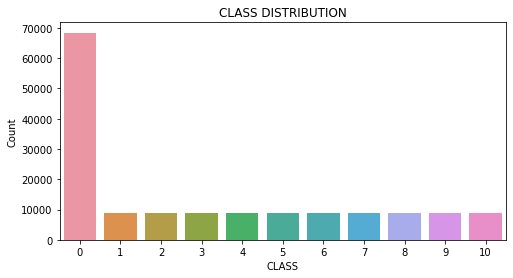

In [10]:
fig, ax = plt.subplots(figsize=(8, 4))
sns.countplot(data=df, x=df.CLASS,)
plt.title('CLASS DISTRIBUTION')
plt.xlabel('CLASS')
plt.ylabel('Count')

# fig.savefig("img1.png", dpi=2000)

Text(0.5, 1.0, 'Weightage of different classes in the dataset')

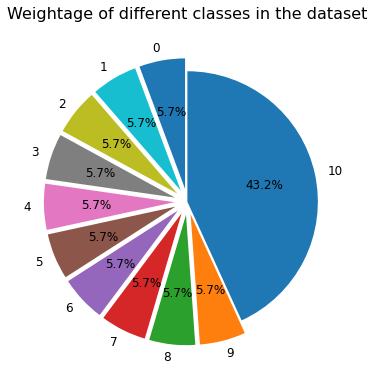

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))

# numbers = {0: 9000, 1: 9000, 2: 9000, 3: 9000, 4: 9000, 5: 9000, 6: 9000, 7: 9000, 8: 9000, 9: 9000, 10: 68400}

myexplode = [0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1 , 0.1, 0.1, 0.1]
ax.pie(x=df.CLASS.value_counts(), labels = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0], autopct='%1.1f%%', startangle=90,
      textprops={'fontsize':12}, shadow=False, explode=myexplode, counterclock=False)

# title
ax.set_title("Weightage of different classes in the dataset", fontdict={"fontsize":16}, pad=20)

# fig.savefig("img2.png", dpi=2000)

### Correlation Matrix

We are going to see which features are correlated to each other. In other words, we can find out that the outcome mostly depends on which features.

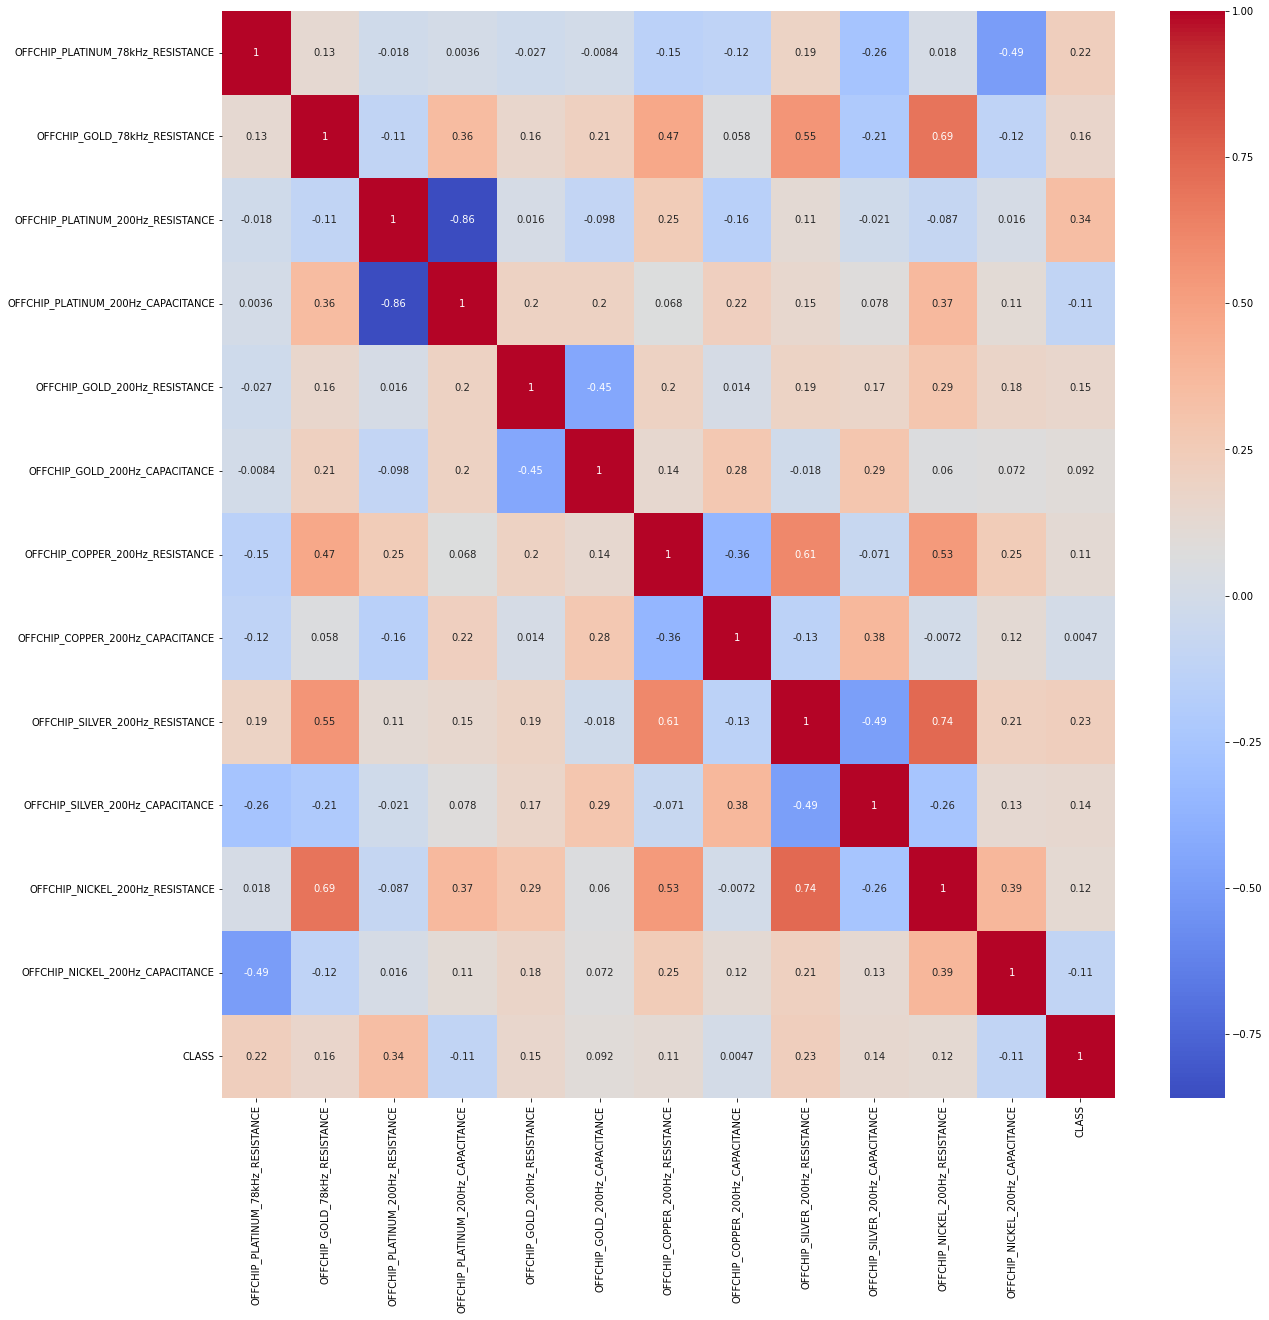

In [12]:
#plotting the coorelation heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

plt.savefig("img3.png", dpi=1000)

There is no major correlation found among the features. So, the outcome won't dependent on one or two features.

### Reading's Count of Some Important Features

Here, we are plotting some important feature's reading count. Features are selected on the basis of correlation with the **CLASS** feature.

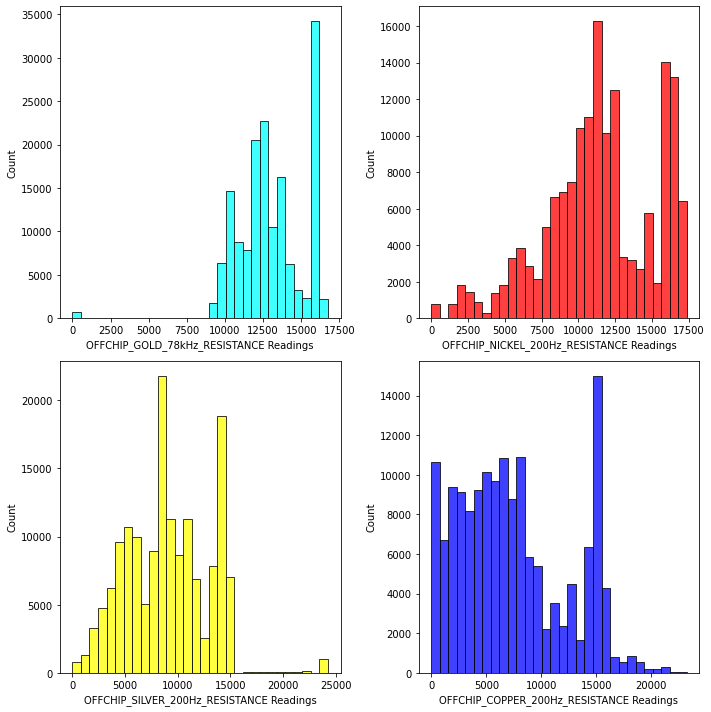

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

grp1 = sns.histplot(data=df.OFFCHIP_GOLD_78kHz_RESISTANCE, bins=30, color='cyan', ax=axes[0][0])
grp1.set(xlabel="OFFCHIP_GOLD_78kHz_RESISTANCE Readings")

grp2 = sns.histplot(data=df.OFFCHIP_NICKEL_200Hz_RESISTANCE, bins=30, color='r', ax=axes[0][1])
grp2.set(xlabel="OFFCHIP_NICKEL_200Hz_RESISTANCE Readings")

grp3 = sns.histplot(data=df.OFFCHIP_SILVER_200Hz_RESISTANCE, bins=30, color='yellow', ax=axes[1][0])
grp3.set(xlabel="OFFCHIP_SILVER_200Hz_RESISTANCE Readings")

grp4 = sns.histplot(data=df.OFFCHIP_COPPER_200Hz_RESISTANCE, bins=30, color='b', ax=axes[1][1])
grp4.set(xlabel="OFFCHIP_COPPER_200Hz_RESISTANCE Readings")

plt.tight_layout()

# plt.savefig("img4.png", dpi=2000)

### Readings of Gold 78Khz IDE

According to Correlation Matrix, this features is most correlated so we are going to explore it.<br>
Here, how the readings of this sensor/feature is varying for all the classes are plotted.

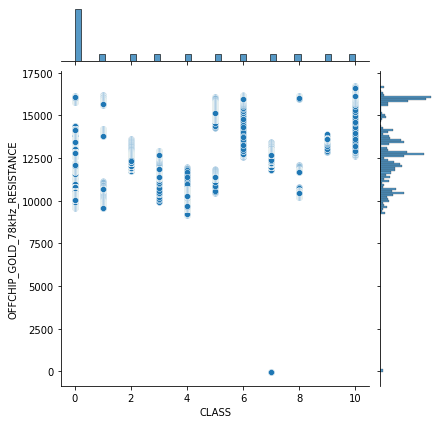

In [14]:
# sns.pairplot(df, hue='CLASS')
sns.jointplot(data=df, x="CLASS", y=df.OFFCHIP_GOLD_78kHz_RESISTANCE, kind='scatter')

# plt.savefig("img5.jpg", dpi=2000)

## Preparing dataset for training and testing

In [15]:
# spiltting data into training and testing in (80/20 ratio)

x_train, x_test, y_train, y_test = train_test_split(df.drop('CLASS', axis=1), df['CLASS'], test_size=0.2, random_state=42)

## Model Building

### Random Forest Classifier

In [16]:
# Create a random forest classifier

rfc = RandomForestClassifier()

In [17]:
# Training the model using the training data
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [18]:
# Training Accuracy
rfc.score(x_train, y_train)

1.0

In [19]:
# Predicting the model accuracy
rfc_pred = rfc.predict(x_test)

### Feature Importance Plot

Visualize the importance of each feature in the Random Forest model.

Text(0.5, 1.0, 'Random Forest Feature Importance')

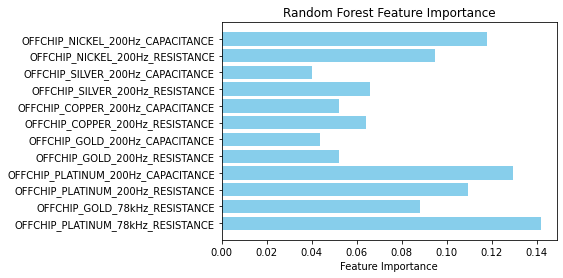

In [20]:
feature_importance = rfc.feature_importances_
features = df.columns[:-1]

plt.figure()
plt.barh(features, feature_importance, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')

# plt.savefig("img6.png", dpi=2000)

## Model Evaluation

### Confusion Matrix Heatmap For Random Forest

Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

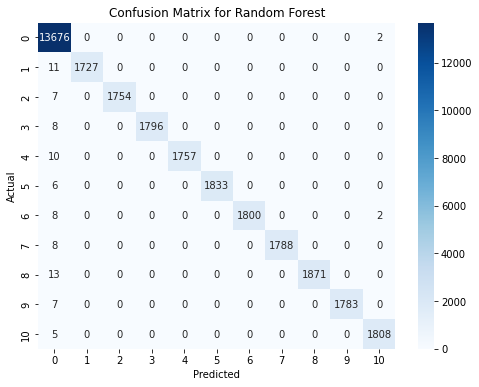

In [21]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,rfc_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')

# plt.savefig("confusion.png", dpi=2000)

### Graphical representation of Predicted Values's Count

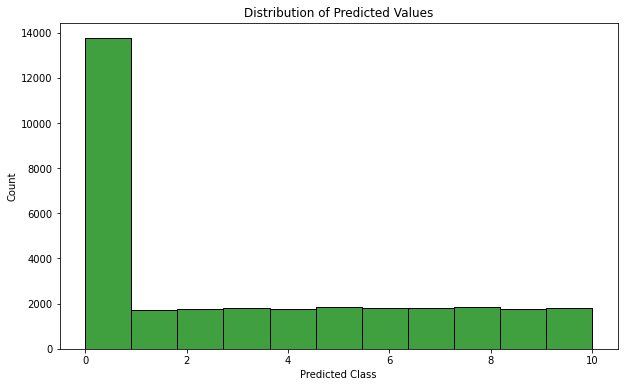

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(rfc_pred, bins=11, kde=False, color='green')
plt.title('Distribution of Predicted Values')
plt.xlabel('Predicted Class')
plt.ylabel('Count')

plt.savefig("predicted.png", dpi=2000)

### Classification Report & Accuracy

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rfc_pred))
print("Accuracy = ", accuracy_score(y_test, rfc_pred)*100)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     13678
           1       1.00      0.99      1.00      1738
           2       1.00      1.00      1.00      1761
           3       1.00      1.00      1.00      1804
           4       1.00      0.99      1.00      1767
           5       1.00      1.00      1.00      1839
           6       1.00      0.99      1.00      1810
           7       1.00      1.00      1.00      1796
           8       1.00      0.99      1.00      1884
           9       1.00      1.00      1.00      1790
          10       1.00      1.00      1.00      1813

    accuracy                           1.00     31680
   macro avg       1.00      1.00      1.00     31680
weighted avg       1.00      1.00      1.00     31680

Accuracy =  99.7253787878788


## Conclusion

### For Random Forest Classifier - Analysis

From the metrics provided:

For most of the classes (0 to 10), precision, recall, and F1-score are very high (close to 1.00), indicating that the model is performing exceptionally well for those classes.


**The accuracy of the model is around 99.73%**, which is the proportion of correctly classified instances overall.

In summary, the model seems to be performing well for most of the classes.

# 

## Want to try web app of this model ?
<a href="https://huggingface.co/spaces/abanand132/aqua-alert" target="_blank"> <img src="https://www.transparentpng.com/thumb/click-here-button/VbnO5J-click-here-button-free-transparent-png.png" width=150px alt="click here"> </a>